<h1 style= "color:gold;">About the Data</h1>

This data has been taken from kaggle.com, you can get it from here: [cars4u](https://www.kaggle.com/datasets/sukhmanibedi/cars4u) \
Author of dataset: SUKHMANI BEDI 


### Description of the Dataset Features

This dataset provides key information about various used cars available for sale. Here’s a brief description of each feature:

1. **S.No.**: A serial number for indexing the entries in the dataset.

2. **Name**: The model name of the car, indicating the manufacturer and specific model type.

3. **Location**: The city where the car is located, which can influence pricing and demand.

4. **Year**: The year in which the car was manufactured, providing insight into its age and potential depreciation.

5. **Kilometers_Driven**: The total distance the car has been driven, which affects its condition and resale value.

6. **Fuel_Type**: The type of fuel the car uses (e.g., Petrol, Diesel, CNG), impacting running costs and efficiency.

7. **Transmission**: Indicates whether the car has a manual or automatic transmission, influencing driving experience and preference.

8. **Owner_Type**: Specifies if the car is being sold by the first owner, second owner, etc., which can affect trust and pricing.

9. **Mileage**: The fuel efficiency of the car, measured in kilometers per liter (kmpl) or kilometers per kilogram (km/kg), indicating how economical the car is.

10. **Engine**: The engine capacity, measured in cubic centimeters (CC), which can correlate with power and performance.

11. **Power**: The power output of the car's engine, measured in brake horsepower (bhp), affecting performance and driving experience.

12. **Seats**: The number of seats available in the car, indicating its capacity for passengers.

13. **New_Price**: The original price of the car when it was brand new, providing a reference point for depreciation.

14. **Price**: The current selling price of the used car, which reflects its market value based on condition, age, and demand.

This dataset is essential for analyzing car pricing trends and making informed buying or selling decisions in the used car market.

## Purpose of the Analysis
---

The purpose of this analysis was to estimate new prices on cars excluding the use of machine learning algorithms. This approach was driven by several key motivations:

1. **Understanding the Data**: By means of EDA, I aimed to become more familiar with the dataset to ensure a solid foundation for further work. This step is useful in determining trends, patterns, and anomalies, all of which are crucial for arriving at accurate predictions.

2. **Handling Data Quality Issues**: Remediation of missing and inadequate data is essential for any analysis. I manipulated the relevant factors to ensure predictions were based on the best and most comprehensive data available.

3. **Feature Engineering**: Dividing characteristics such as engine size and price into ranks provided a more systematic approach. This grouping helps in understanding the correlations that exist between various car attributes and their effects on price levels.

4. **Minimizing Error**: Splitting the data into separate dataframes for foreign and local cars minimizes the chances of calculation errors. Different markets often have distinct pricing structures and consumer demands, affecting the price units.

5. **Filling Missing Values**: Incorporating tier features to complete missing values in crucial criteria like ‘Price,’ ‘Power,’ and ‘Engine’ strengthens the analysis, resulting in more authoritative projections.

6. **Predicting Price Increases**: By comparing the percentage increase in price of available new models, I established a method to predict prices for other car makes. This approach builds upon historical data, ensuring that predictions maintain a realistic connection to actual pricing.

7. **Verifying Predictions**: Lastly, checking for multicollinearity among features ensured that my predictions aligned with the established relationships in the dataset. This verification step adds credibility to my work, confirming that the developed model corresponds to the real structure of the data.
---

# 1. Importing Libraries

In [110]:
# Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Loading the dataset

In [111]:
# Loading the dataset
cars_df = pd.read_csv('../data/used_cars_data.csv')

In [112]:
# Lets print the first few rows
cars_df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [113]:
cars_df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [114]:
# Since there are serial numbers in the dataset, we will use them as indexes
cars_df = cars_df.set_index('S.No.')

# ignore the error below if any, the code above will only run once

In [115]:
cars_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# EDA on used cars and their prices

# 3. Lets see some information about the dataset

In [116]:
# Lets check the shape of the dataset
cars_df.shape

(7253, 13)

In [117]:
# information about the dataset
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


New_Price column is having a whopping amount of null values, 
while Price is having the second most null values in the data.

In [118]:
# Checkup for the data types
cars_df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

Some featues/columns should be of numeric format but are object. Some feature engineering is required to draw insights.

In [119]:
# Lets check if there are any null values
cars_df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

These duplicates needs to be taken care of.

In [120]:
# Lets check if there are any duplicate values
cars_df.duplicated().sum()

1

A single duplicate value exists in the whole dataset, this would not be bothersome.

### Observations

- The dataset contains **7,253 records** and **13 features**, including several missing and a single duplicate value.
- Several columns, such as **power**, are of **object datatype**, yet they represent numeric data. This indicates that **feature engineering** is necessary to extract valuable insights.
- The **new_price** column has a significant number of null values, which must be addressed to enable deeper analysis.

### Next Steps

1. **Data Formatting**: Convert data to the appropriate formats to ensure accurate analysis.
2. **Handling Null Values**: Develop a strategy to address the null data points, ensuring the integrity of the dataset for further analysis.

# 4. Some necessary feature engineering 

In [121]:
# Lets go through the datatype of each column one more time
cars_df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [122]:
cars_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [123]:
cars_df['Engine'].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

In [124]:
# Lets remove 'CC' from the values and add it to the columns name
cars_df['Engine'] = cars_df['Engine'].str.replace('CC', '')
cars_df.rename(columns = {'Engine':'Engine(CC)'}, inplace = True)

In [125]:
# Converting the 'Engine(CC)' column to float
cars_df['Engine(CC)'] = cars_df['Engine(CC)'].astype(float)

In [126]:
cars_df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine(CC)', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [127]:
cars_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine(CC),Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.8 bhp,5.0,NaN,17.74


In [128]:
# I will do thr same to the 'Power' column
cars_df['Power'].nunique()

386

In [129]:
# Removing 'bhp' from the values from 'power' column and adding it to the columns name
cars_df['Power'] = cars_df['Power'].str.replace('bhp', '')
cars_df.rename(columns = {'Power':'Power(bhp)'}, inplace = True)

In [130]:
# Conveting the 'Power(bhp)' column to float
#cars_df['Power(bhp)'] = cars_df['Power(bhp)'].astype(float)

In [131]:
# ValueError: could not convert string to float: 'null '
# The error indicates an abnormality in the 'Power' column
cars_df['Power(bhp)'].value_counts()

Power(bhp)
74        280
98.6      166
73.9      152
140       142
null      129
         ... 
421         1
89.75       1
387.3       1
226.6       1
241.6       1
Name: count, Length: 386, dtype: int64

In [132]:
# Converting 'null' values to NaN
cars_df['Power(bhp)'] = cars_df['Power(bhp)'].replace('null ', np.nan)

In [133]:
# Conveting the 'Power(bhp)' column to float
cars_df['Power(bhp)'] = cars_df['Power(bhp)'].astype(float)

In [134]:
cars_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine(CC),Power(bhp),Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,NaN,17.74


In [135]:
# now I will drop the unit of Milage (changed to kmpl) from the 'Mileage' column
# and i will consider 1kg ~ 1litre
cars_df['Mileage'] = cars_df['Mileage'].str.replace('kmpl', '')
cars_df['Mileage'] = cars_df['Mileage'].str.replace('km/kg', '')

In [136]:
# Conveting the 'Mileage' column to float
cars_df['Mileage'] = cars_df['Mileage'].astype(float)

In [137]:
cars_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine(CC),Power(bhp),Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [138]:
# now lets repeat the same for the 'Price' and 'New_Price' column
cars_df['New_Price'].unique()

array([nan, '8.61 Lakh', '21 Lakh', '10.65 Lakh', '32.01 Lakh',
       '47.87 Lakh', '10.57 Lakh', '12.33 Lakh', '11.12 Lakh',
       '23.64 Lakh', '18.64 Lakh', '19.34 Lakh', '49.14 Lakh',
       '11.81 Lakh', '16.65 Lakh', '6.67 Lakh', '6.45 Lakh', '6.41 Lakh',
       '27 Lakh', '5.13 Lakh', '54.43 Lakh', '9.51 Lakh', '9.96 Lakh',
       '14.44 Lakh', '4.53 Lakh', '95.04 Lakh', '13.49 Lakh', '1.28 Cr',
       '60.88 Lakh', '7.39 Lakh', '69.47 Lakh', '8.78 Lakh', '12.74 Lakh',
       '10.52 Lakh', '11.98 Lakh', '8.54 Lakh', '33.58 Lakh', '9.12 Lakh',
       '5.29 Lakh', '44.28 Lakh', '20.74 Lakh', '11.74 Lakh',
       '25.52 Lakh', '14.07 Lakh', '95.13 Lakh', '8.34 Lakh', '8.85 Lakh',
       '25.4 Lakh', '16.67 Lakh', '79.43 Lakh', '6.62 Lakh', '1.04 Cr',
       '58.67 Lakh', '28.37 Lakh', '4.48 Lakh', '72.64 Lakh',
       '36.15 Lakh', '44.59 Lakh', '12 Lakh', '14.65 Lakh', '53.72 Lakh',
       '33.91 Lakh', '12.51 Lakh', '9.74 Lakh', '95.38 Lakh',
       '60.59 Lakh', '11.28 Lakh', 

The prices seems to be either in 'Lakh' or 'Cr', lets see if it really is like this.

In [139]:
cars_df.loc[cars_df['New_Price'].str.contains('Lakh', na=False), 'New_Price'].count()

986

In [140]:
cars_df.loc[cars_df['New_Price'].str.contains('Cr', na=False), 'New_Price'].count()

20

In [141]:
cars_df['New_Price'].count()

1006

In [142]:
986 + 20

1006

This confirms that the prices are in either 'Lakh' or 'Cr'

In [143]:
# Lets convert Crs in Lakhs

def drop_price_unit(x):
    if isinstance(x, str):
        if 'Cr' in x:
            x = x.replace('Cr', '').strip()
            return float(x) * 100
        elif 'Lakh' in x:
            x = x.replace('Lakh', '').strip()
            return float(x)
        else:
            return float(x)
    else:
        return x
    
cars_df['New_Price'] = cars_df['New_Price'].apply(drop_price_unit)
cars_df['New_Price'].value_counts()

New_Price
63.71    6
95.13    6
4.78     6
33.36    6
44.28    5
        ..
6.83     1
9.09     1
7.17     1
11.77    1
18.16    1
Name: count, Length: 625, dtype: int64

In [144]:
cars_df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine(CC)           float64
Power(bhp)           float64
Seats                float64
New_Price            float64
Price                float64
dtype: object

In [145]:
cars_df.describe(percentiles=[0.10, 0.20, 0.50, 0.70, 0.90, 0.95])

,Year,Kilometers_Driven,Mileage,Engine(CC),Power(bhp),Seats,New_Price,Price
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.279722,22.779692,9.479468
std,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.811660,27.759344,11.187917
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,3.910000,0.440000
10%,2009.000000,2.000000e+04,12.800000,1061.000000,67.040000,5.000000,5.560000,2.300000
20%,2011.000000,2.982420e+04,14.490000,1197.000000,73.940000,5.000000,7.130000,3.100000
50%,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
70%,2015.000000,6.900000e+04,20.360000,1799.000000,123.240000,5.000000,21.000000,8.446000
90%,2017.000000,9.741580e+04,24.000000,2494.000000,184.000000,7.000000,54.885000,22.500000
95%,2018.000000,1.202418e+05,25.440000,2982.000000,204.000000,7.000000,71.652500,32.446000


#### Observation
The 'Engine(CC)' has a min value of 72, but there is no vehicle with Power less than 34.2bhp.
This may be a potential outlier

In [146]:
# Lets try to see if there are any cars with engine less than 100
cars_df[cars_df['Engine(CC)'] < 100]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine(CC),Power(bhp),Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.0


That turned out to be an an electric car.

In [147]:
# Lets create a new column 'Engine Tier' to categorize the cars by engine

engine_bins = [0, 100, 500, 1000, 1500, 2000, 3000, 6000]
engine_labels = ['electric' ,'very small', 'small', 'medium', 'large', 'very large', 'huge']

cars_df['Engine Tier'] = pd.cut(cars_df['Engine(CC)'], engine_bins, labels=engine_labels)

In [148]:
# Lets create a new column 'Price Tier' to categorize the cars by price

price_bins = [0, 1, 5, 15, 30, 50, 100, 200]
price_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Extreme', 'Luxury']

cars_df['Price Tier'] = pd.cut(cars_df['Price'], price_bins, labels=price_labels)

In [149]:
# Lets give cars an overall tier based on engine tier and price tier
# Method to create Overall Tier
def determine_overall_tier(row):
    return f"{row['Engine Tier']} - {row['Price Tier']}"

# Apply the method to create the Overall Tier column
cars_df['Overall Tier'] = cars_df.apply(determine_overall_tier, axis=1)

In [150]:
cars_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine(CC),Power(bhp),Seats,New_Price,Price,Engine Tier,Price Tier,Overall Tier
S.No.,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,small,Low,small - Low
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,large,Medium,large - Medium
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,medium,Low,medium - Low
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,medium,Medium,medium - Medium
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,large,High,large - High


In [151]:
cars_df['Overall Tier'] = cars_df['Overall Tier'].str.lower()

In [152]:
cars_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine(CC),Power(bhp),Seats,New_Price,Price,Engine Tier,Price Tier,Overall Tier
S.No.,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,small,Low,small - low
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,large,Medium,large - medium
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,medium,Low,medium - low
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,medium,Medium,medium - medium
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,large,High,large - high


In [153]:
# First I will observe the correlation between the data values

corr_matrix = cars_df[['Mileage', 'Engine(CC)', 'Power(bhp)', 'Kilometers_Driven' , 'Seats', 'New_Price', 'Price']].corr()
corr_matrix

,Mileage,Engine(CC),Power(bhp),Kilometers_Driven,Seats,New_Price,Price
Mileage,1.000000,-0.593569,-0.531771,-0.069122,-0.310632,-0.378327,-0.306593
Engine(CC),-0.593569,1.000000,0.859771,0.094818,0.399262,0.735981,0.658354
Power(bhp),-0.531771,0.859771,1.000000,0.030164,0.095905,0.877708,0.772566
Kilometers_Driven,-0.069122,0.094818,0.030164,1.000000,0.090221,-0.008221,-0.011493
Seats,-0.310632,0.399262,0.095905,0.090221,1.000000,-0.019459,0.052225
New_Price,-0.378327,0.735981,0.877708,-0.008221,-0.019459,1.000000,0.871847
Price,-0.306593,0.658354,0.772566,-0.011493,0.052225,0.871847,1.000000


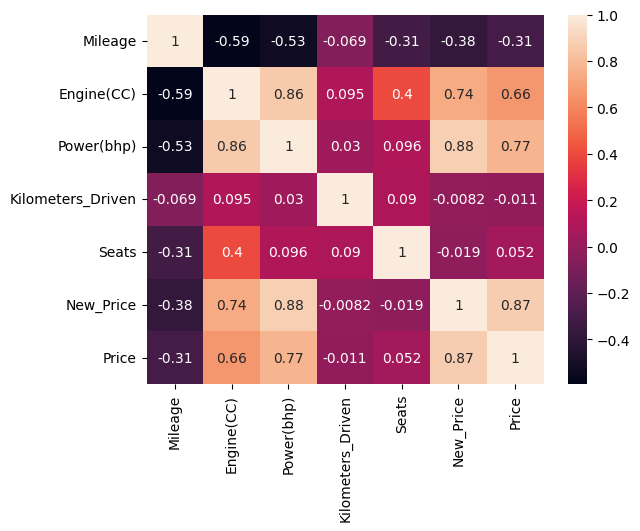

In [154]:
# Heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot = True)
plt.show()

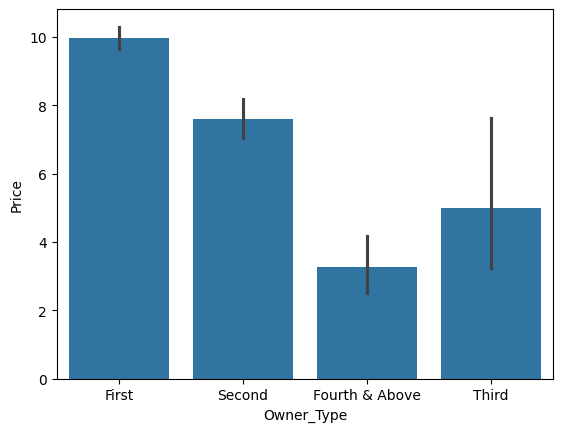

In [155]:
# Owner_Type can have a strong correlation with the price
# Lets plot to see
sns.barplot(x = 'Owner_Type', y = 'Price', data = cars_df)
plt.show()

## Key Observations

## Correlation Matrix Insights

### 1. Strong Correlations
- **Power (bhp) and New Price**: 
  - **Correlation**: 0.877708
  - **Insight**: Higher power is strongly associated with higher new prices.

- **Engine (CC) and New Price**: 
  - **Correlation**: 0.735981
  - **Insight**: Larger engine capacity correlates positively with new price.

- **Power (bhp) and Engine (CC)**: 
  - **Correlation**: 0.859771
  - **Insight**: Strong relationship, indicating larger engines typically produce more horsepower.

### 2. Moderate Correlations
- **Mileage and New Price**: 
  - **Correlation**: -0.378327
  - **Insight**: Higher mileage (better fuel efficiency) tends to correlate with lower new prices.

- **Power (bhp) and Mileage**: 
  - **Correlation**: -0.531771
  - **Insight**: Higher power cars generally have lower fuel efficiency.

- **Seats and Engine (CC)**: 
  - **Correlation**: 0.399262
  - **Insight**: Moderate positive correlation, indicating that vehicles with larger engines may often have more seating capacity.

### 3. Weak Correlations
- **Seats and New Price**: 
  - **Correlation**: -0.019459
  - **Insight**: Very weak correlation, suggesting seating capacity does not significantly impact pricing.

- **Seats and Mileage**: 
  - **Correlation**: 0.052225
  - **Insight**: Very weak positive correlation, indicating little relationship between the number of seats and fuel efficiency.

- **Kilomers_Driven**
  - Kilometers_Driven shows a very weak correlation with all other values, so we would not consider this much for our analysis.
### 4. General Observations
- **Price and New Price**: 
  - **Correlation**: 0.871847
  - **Insight**: Strong correlation, showing that the listed price closely aligns with the new price.

## Bar-plot insights:
- Owner_type has a strong influence over price.
- This shows that First or second hand cars are newer and fresh in condition as compared to cars with three or more previous owners.

## What is done so far:
1. Dropped the units in column values.
2. Renamed the columns to represent the unit of values under them.
3. Converted the datatypes of numeric values to int or float where required.
4. Dealt with data anomalies where ovvured.
5. Creation of an 'Overall Tier' column that will help in filling out missing values.

### Next step:
Now I will handle the n.a. values in the data and then Explore the data thoroughly to draw insights and plot them.

# 5. Handling the missing data:

In [156]:
cars_df.loc[cars_df['Mileage'].isnull(), 'Mileage'] = 'Electric'

C:\Users\riyan\AppData\Local\Temp\ipykernel_9512\284465257.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Electric' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  cars_df.loc[cars_df['Mileage'].isnull(), 'Mileage'] = 'Electric'


Since the two missing values were of Electric cars.

In [157]:
cars_df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine(CC)             46
Power(bhp)            175
Seats                  53
New_Price            6247
Price                1234
Engine Tier            46
Price Tier           1234
Overall Tier            0
dtype: int64

<Axes: ylabel='S.No.'>

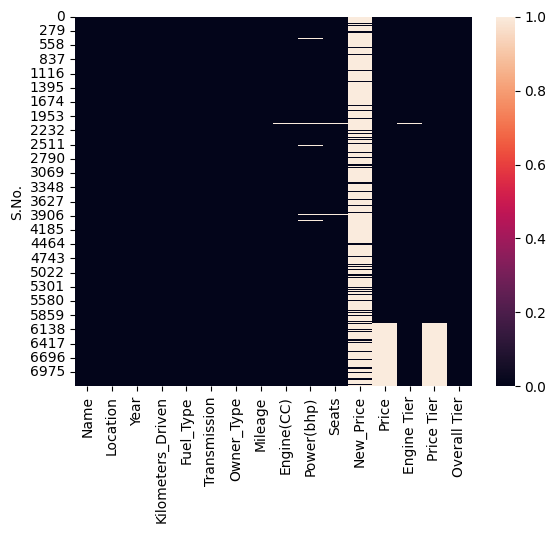

In [158]:
sns.heatmap(cars_df.isnull())

In [159]:
# Price column has clustered missing values
# Lets see some of these
cars_df[cars_df['Price'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine(CC),Power(bhp),Seats,New_Price,Price,Engine Tier,Price Tier,Overall Tier
S.No.,,,,,,,,,,,,,,,,
6019,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,NaN,NaN,small,NaN,small - nan
6020,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796.0,47.30,5.0,NaN,NaN,small,NaN,small - nan
6021,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,25.27,NaN,very large,NaN,very large - nan
6022,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,NaN,medium,NaN,medium - nan
6023,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197.0,82.85,5.0,NaN,NaN,medium,NaN,medium - nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN,large,NaN,large - nan
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN,medium,NaN,medium - nan
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN,medium,NaN,medium - nan


<Axes: xlabel='Year', ylabel='Price'>

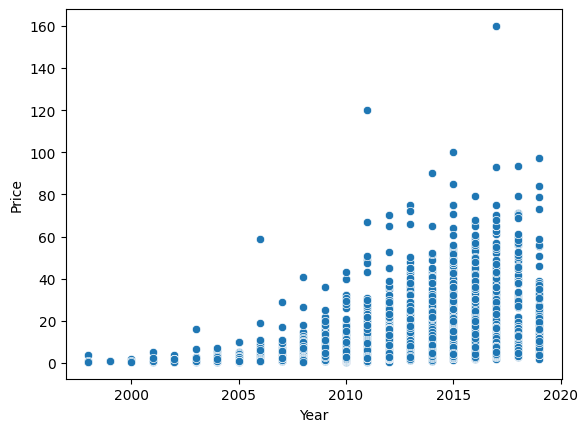

In [160]:
# Lets create a scatter plot
sns.scatterplot(x = 'Year', y = 'Price', data = cars_df)

<Axes: xlabel='Engine Tier', ylabel='Price'>

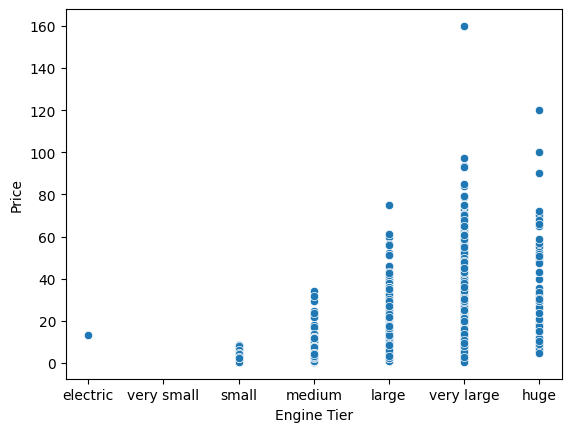

In [161]:
# Lets create a scatter plot
sns.scatterplot(x = 'Engine Tier', y = 'Price', data = cars_df)

No pattern can se seen, this must be an error related to data collection.

In [162]:
# Lets fill the missing values in Engine(CC) column with the mean of the Price Tiers

cars_df['Engine(CC)'] = cars_df['Engine(CC)'].fillna(
    cars_df.groupby('Price Tier')['Engine(CC)'].transform('mean')
)

C:\Users\riyan\AppData\Local\Temp\ipykernel_9512\3530912675.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cars_df.groupby('Price Tier')['Engine(CC)'].transform('mean')


In [163]:
cars_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine(CC),Power(bhp),Seats,New_Price,Price,Engine Tier,Price Tier,Overall Tier
S.No.,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998.0,58.16,5.0,NaN,1.75,small,Low,small - low
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,large,Medium,large - medium
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199.0,88.70,5.0,8.61,4.50,medium,Low,medium - low
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,medium,Medium,medium - medium
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968.0,140.80,5.0,NaN,17.74,large,High,large - high


In [164]:
cars_df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine(CC)             10
Power(bhp)            175
Seats                  53
New_Price            6247
Price                1234
Engine Tier            46
Price Tier           1234
Overall Tier            0
dtype: int64

In [165]:
cars_df[cars_df['Engine(CC)'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine(CC),Power(bhp),Seats,New_Price,Price,Engine Tier,Price Tier,Overall Tier
S.No.,,,,,,,,,,,,,,,,
6042,Skoda Laura 1.8 TSI Ambition,Bangalore,2009,72000,Petrol,Manual,Second,17.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan - nan
6541,Toyota Etios Liva Diesel TRD Sportivo,Bangalore,2012,56600,Diesel,Manual,First,23.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan - nan
6544,Hyundai i20 new Sportz AT 1.4,Bangalore,2012,58000,Petrol,Automatic,Second,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan - nan
6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan - nan
6643,BMW 5 Series 520d Sedan,Bangalore,2009,150000,Diesel,Automatic,Second,18.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan - nan
6651,Maruti Swift 1.3 VXi,Kolkata,2015,36009,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan - nan
6677,Fiat Punto 1.4 Emotion,Jaipur,2010,65000,Petrol,Manual,Third,14.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan - nan
6685,Maruti Swift 1.3 VXi,Pune,2010,115000,Petrol,Manual,Second,16.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan - nan
6880,BMW 5 Series 520d Sedan,Chennai,2009,95000,Diesel,Automatic,Second,18.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan - nan


In [166]:
# No data is available about these cars, so its better to drop them
cars_df.dropna(subset=('Engine(CC)'),inplace = True)

In [167]:
cars_df[cars_df['Power(bhp)'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine(CC),Power(bhp),Seats,New_Price,Price,Engine Tier,Price Tier,Overall Tier
S.No.,,,,,,,,,,,,,,,,
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8,1399.0,NaN,5.0,NaN,2.00,medium,Low,medium - low
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.30,medium,Low,medium - low
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0,1086.0,NaN,5.0,NaN,2.10,medium,Low,medium - low
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086.0,NaN,5.0,NaN,0.85,medium,Very Low,medium - very low
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0,1086.0,NaN,5.0,NaN,1.67,medium,Low,medium - low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891,Toyota Etios GD,Kolkata,2013,60000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,NaN,medium,NaN,medium - nan
6896,Toyota Etios Liva GD,Hyderabad,2013,86000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,NaN,medium,NaN,medium - nan
6947,Toyota Etios Liva G,Delhi,2012,77800,Petrol,Manual,First,18.3,1197.0,NaN,5.0,NaN,NaN,medium,NaN,medium - nan


In [168]:
# Lets do the same for Power(bhp) column in the same way
# Fill missing values in Power(bhp) column with the mean based on Engine Tier
cars_df['Power(bhp)'] = cars_df['Power(bhp)'].fillna(
    cars_df.groupby('Engine Tier')['Power(bhp)'].transform('mean')
)

C:\Users\riyan\AppData\Local\Temp\ipykernel_9512\3966947796.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cars_df.groupby('Engine Tier')['Power(bhp)'].transform('mean')


In [169]:
cars_df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine(CC)              0
Power(bhp)             36
Seats                  43
New_Price            6237
Price                1224
Engine Tier            36
Price Tier           1224
Overall Tier            0
dtype: int64

In [170]:
# Updating the Engine Tier column to fill in the missing values

cars_df['Engine Tier'] = pd.cut(cars_df['Engine(CC)'], engine_bins, labels=engine_labels)

In [171]:
cars_df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine(CC)              0
Power(bhp)             36
Seats                  43
New_Price            6237
Price                1224
Engine Tier             0
Price Tier           1224
Overall Tier            0
dtype: int64

In [172]:
cars_df[['Price', 'Engine(CC)', 'Power(bhp)']].corr()

,Price,Engine(CC),Power(bhp)
Price,1.000000,0.659160,0.771458
Engine(CC),0.659160,1.000000,0.860795
Power(bhp),0.771458,0.860795,1.000000


In [173]:
# Fill missing values in Price column with the mean based on Engine Tier
cars_df['Price'] = cars_df['Price'].fillna(
    cars_df.groupby('Engine Tier')['Price'].transform('mean')
)

C:\Users\riyan\AppData\Local\Temp\ipykernel_9512\2965843199.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cars_df.groupby('Engine Tier')['Price'].transform('mean')


In [174]:
cars_df[['Price', 'Engine(CC)', 'Power(bhp)']].corr()

,Price,Engine(CC),Power(bhp)
Price,1.000000,0.677488,0.761339
Engine(CC),0.677488,1.000000,0.860795
Power(bhp),0.761339,0.860795,1.000000


So now the missing values in price are filled without affecting the origincal correlation.

In [175]:
# 
cars_df['Price'] = cars_df['Price'].fillna(
    cars_df.groupby('Engine Tier')['Price'].transform('mean')
)

C:\Users\riyan\AppData\Local\Temp\ipykernel_9512\3011591669.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cars_df.groupby('Engine Tier')['Price'].transform('mean')


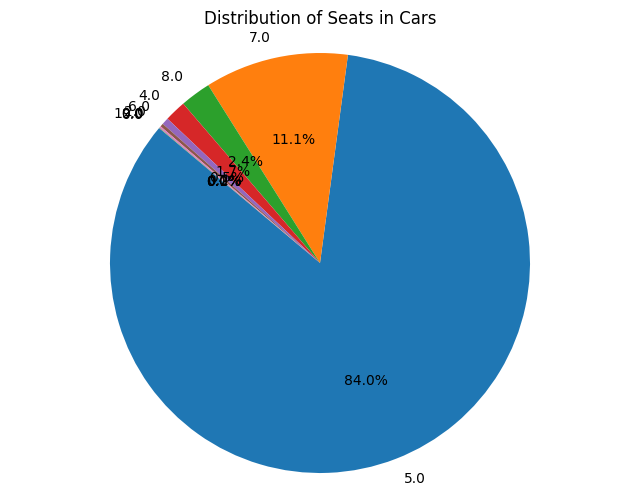

In [176]:
# Lets see what the values in Seats column are
# Create a pie chart

# Count occurrences of each unique value in the Seats column
seats_counts = cars_df['Seats'].value_counts()

# Count occurrences of each unique value in the Seats column
seats_counts = cars_df['Seats'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(seats_counts, labels=seats_counts.index.astype(str), autopct='%0.1f%%', startangle=140)
plt.title('Distribution of Seats in Cars')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

We wont be using Seats for most part of the analysis, so lets leave them as they are for now.

In [177]:
cars_df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine(CC)              0
Power(bhp)             36
Seats                  43
New_Price            6237
Price                   0
Engine Tier             0
Price Tier           1224
Overall Tier            0
dtype: int64

In [178]:
# Filling up the missing values in Price Tier

cars_df['Price Tier'] = pd.cut(cars_df['Price'], price_bins, labels=price_labels)

In [179]:
# Fixing the Overall Tier column

cars_df['Overall Tier'] = np.nan

In [180]:
cars_df['Overall Tier'] =cars_df.apply(determine_overall_tier, axis=1)

In [181]:
cars_df['Overall Tier'].value_counts()

Overall Tier
medium - Low              2279
medium - Medium           1331
large - Medium             762
small - Low                653
very large - High          558
very large - Medium        479
large - Low                292
large - High               280
very large - Very High     169
very large - Low           102
large - Very High           71
very large - Extreme        64
medium - Very Low           52
small - Very Low            37
small - Medium              24
huge - Very High            21
huge - Extreme              16
huge - High                 16
medium - High               10
huge - Medium               10
large - Extreme              8
medium - Very High           2
large - Very Low             2
very large - Luxury          1
electric - Medium            1
huge - Luxury                1
very large - Very Low        1
huge - Low                   1
Name: count, dtype: int64

# Predicting New car prices

<Axes: xlabel='Overall Tier', ylabel='Price'>

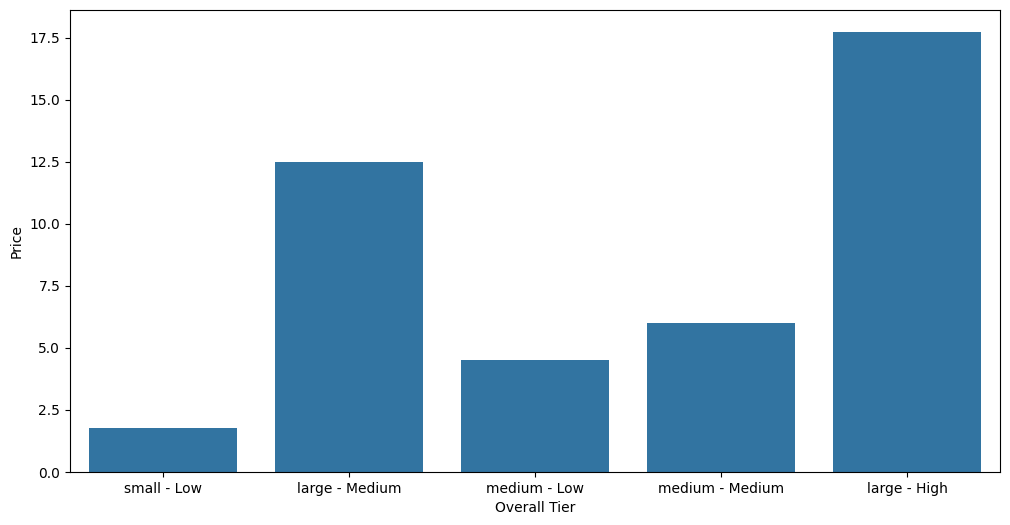

In [182]:
# Lets see the impact of the overall tier on the new price
plt.figure(figsize=(12, 6))
sns.barplot(x=cars_df['Overall Tier'].head(5), y='Price', data=cars_df)

<Axes: xlabel='Overall Tier', ylabel='Price'>

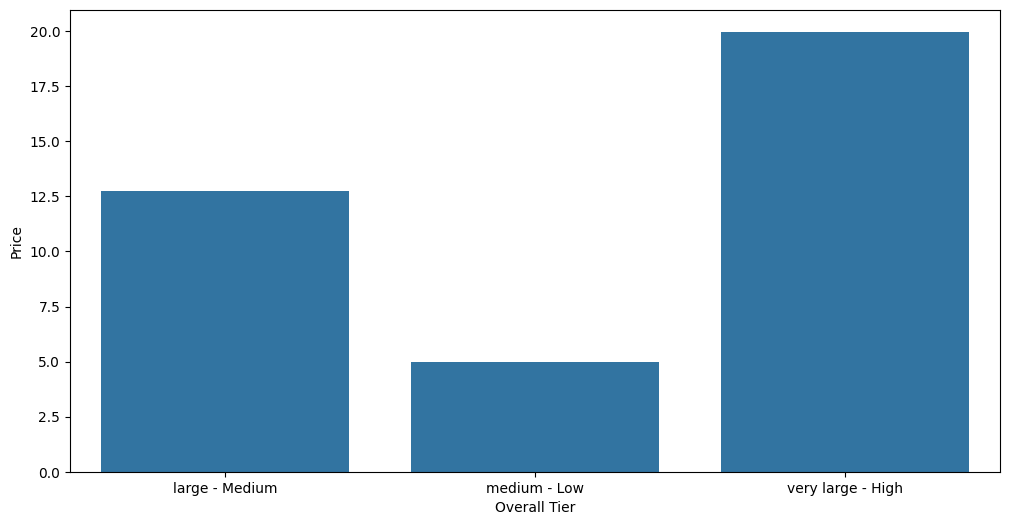

In [183]:
plt.figure(figsize=(12, 6))
sns.barplot(x=cars_df['Overall Tier'].tail(5), y='Price', data=cars_df)

Text(0.5, 1.0, 'Impact of Overall Tier on Price')

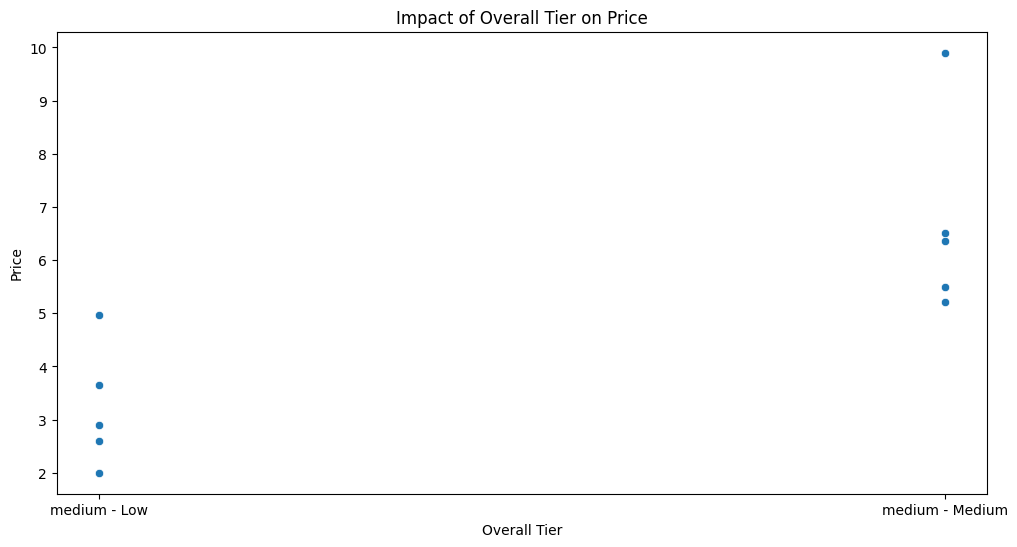

In [184]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=cars_df['Overall Tier'].sample(10), y='Price', data=cars_df)
plt.title('Impact of Overall Tier on Price')

# Key Observations
- The Overall Tier is based on the price and the engine of the cars.
- This maintains the correlation between the Prices of Cars and the Engine Size.
- This Overall Tier can be used to predict the new prices

In [185]:
# For the last part, it is important to consider that imported cars have a much much higher price
# when compared to local cars, we need to separate them out

# Lets create a new column called Brand
cars_df['Brand'] = cars_df['Name'].apply(lambda x: x.split()[0])

In [186]:
pd.set_option('display.max_rows', None)

In [187]:
cars_df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [188]:
# Lets see the average price of each brand
brand_price = cars_df.groupby('Brand')['Price'].mean()
brand_price

Brand
Ambassador         1.350000
Audi              23.465019
BMW               23.939091
Bentley           48.218525
Chevrolet          3.813948
Datsun             3.378360
Fiat               3.682708
Force              9.333333
Ford               6.801958
Hindustan         12.744100
Honda              5.657408
Hyundai            5.600822
ISUZU             14.689342
Isuzu             19.989013
Jaguar            34.237759
Jeep              17.051643
Lamborghini      120.000000
Land              37.245018
Mahindra           9.551809
Maruti             4.491260
Mercedes-Benz     25.550783
Mini              24.112585
Mitsubishi        13.288673
Nissan             5.518396
OpelCorsa          4.968912
Porsche           46.855159
Renault            5.673670
Skoda              8.087954
Smart              3.000000
Tata               3.932792
Toyota            12.362577
Volkswagen         5.669678
Volvo             18.321586
Name: Price, dtype: float64

As we can observe, local brand's cars have a much lower price compared to imported ones.

## Conclusion
- Imported Brands: The mean prices for imported brands like Lamborghini, Bentley, and Jaguar are significantly higher than those of Indian brands, confirming that imported cars generally command a much higher price.
- Indian Brands: Brands like Maruti, Tata, and Ambassador have much lower mean prices, reinforcing the distinction between domestic and imported vehicles.

## The Next Step:
Now I will create two separate dataframes, one for imported cars and the other for local ones.

In [189]:
# Defining imported and local brands
imported_brands = [
    'Audi', 'Mitsubishi', 'Mercedes-Benz', 'BMW', 
    'Porsche', 'Jaguar', 'Volvo', 'Chevrolet', 'Mini', 
    'Bentley', 'Lamborghini', 'Smart', 'Land'
]

local_brands = [
    'Maruti', 'Nissan','Hyundai', 'Honda', 'Toyota', 'Volkswagen', 
    'Tata', 'Mahindra', 'Ford', 'Datsun', 
    'Renault', 'Skoda', 'Fiat', 'Jeep', 'Ambassador', 
    'Isuzu', 'ISUZU', 'Force', 'Hindustan', 'OpelCorsa'
]

Text(0.5, 1.0, 'Average Price of Imported Cars')

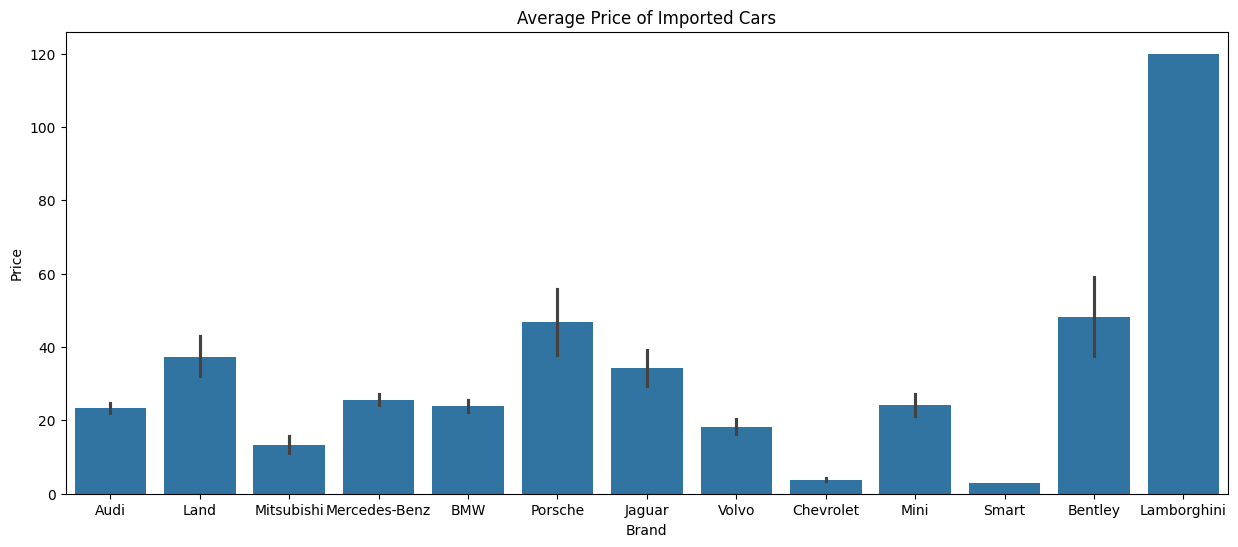

In [190]:
# Lets observe the average price of imported and local brands by a bar plot

plt.figure(figsize=(15, 6))
sns.barplot(x='Brand', y='Price', data=cars_df[cars_df['Brand'].isin(imported_brands)])
plt.title('Average Price of Imported Cars')

Text(0.5, 1.0, 'Average Price of Imported Cars')

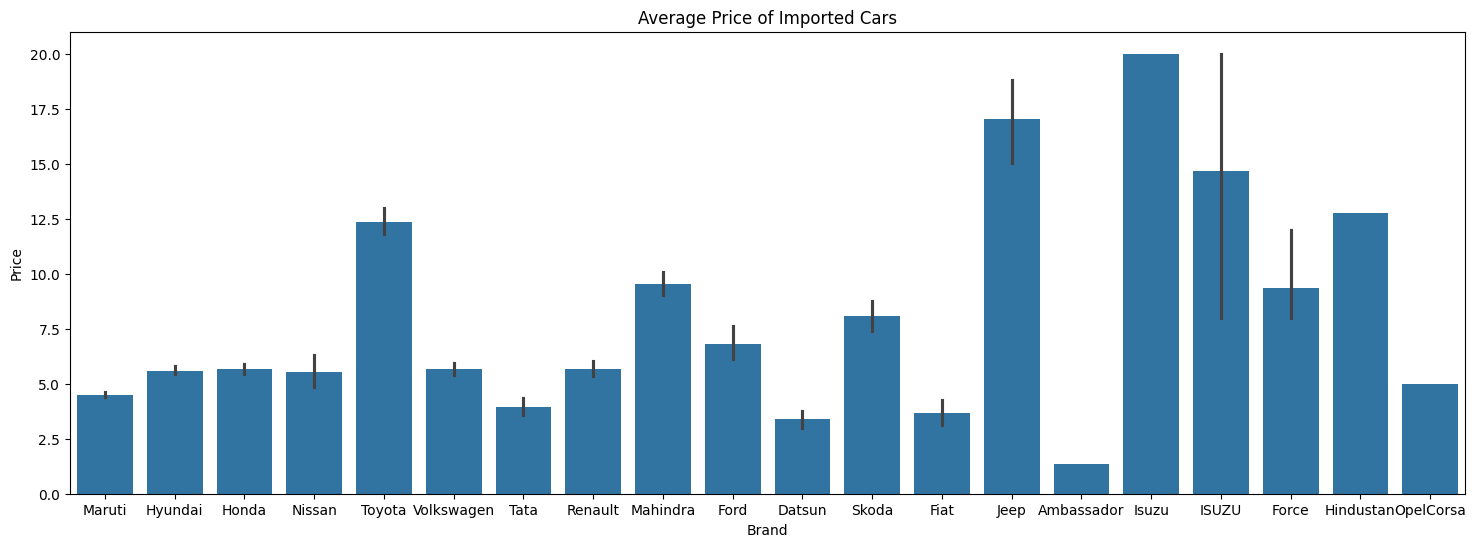

In [191]:
plt.figure(figsize=(18, 6))
sns.barplot(x='Brand', y='Price', data=cars_df[cars_df['Brand'].isin(local_brands)])
plt.title('Average Price of Imported Cars')

<Axes: xlabel='Brand', ylabel='Price'>

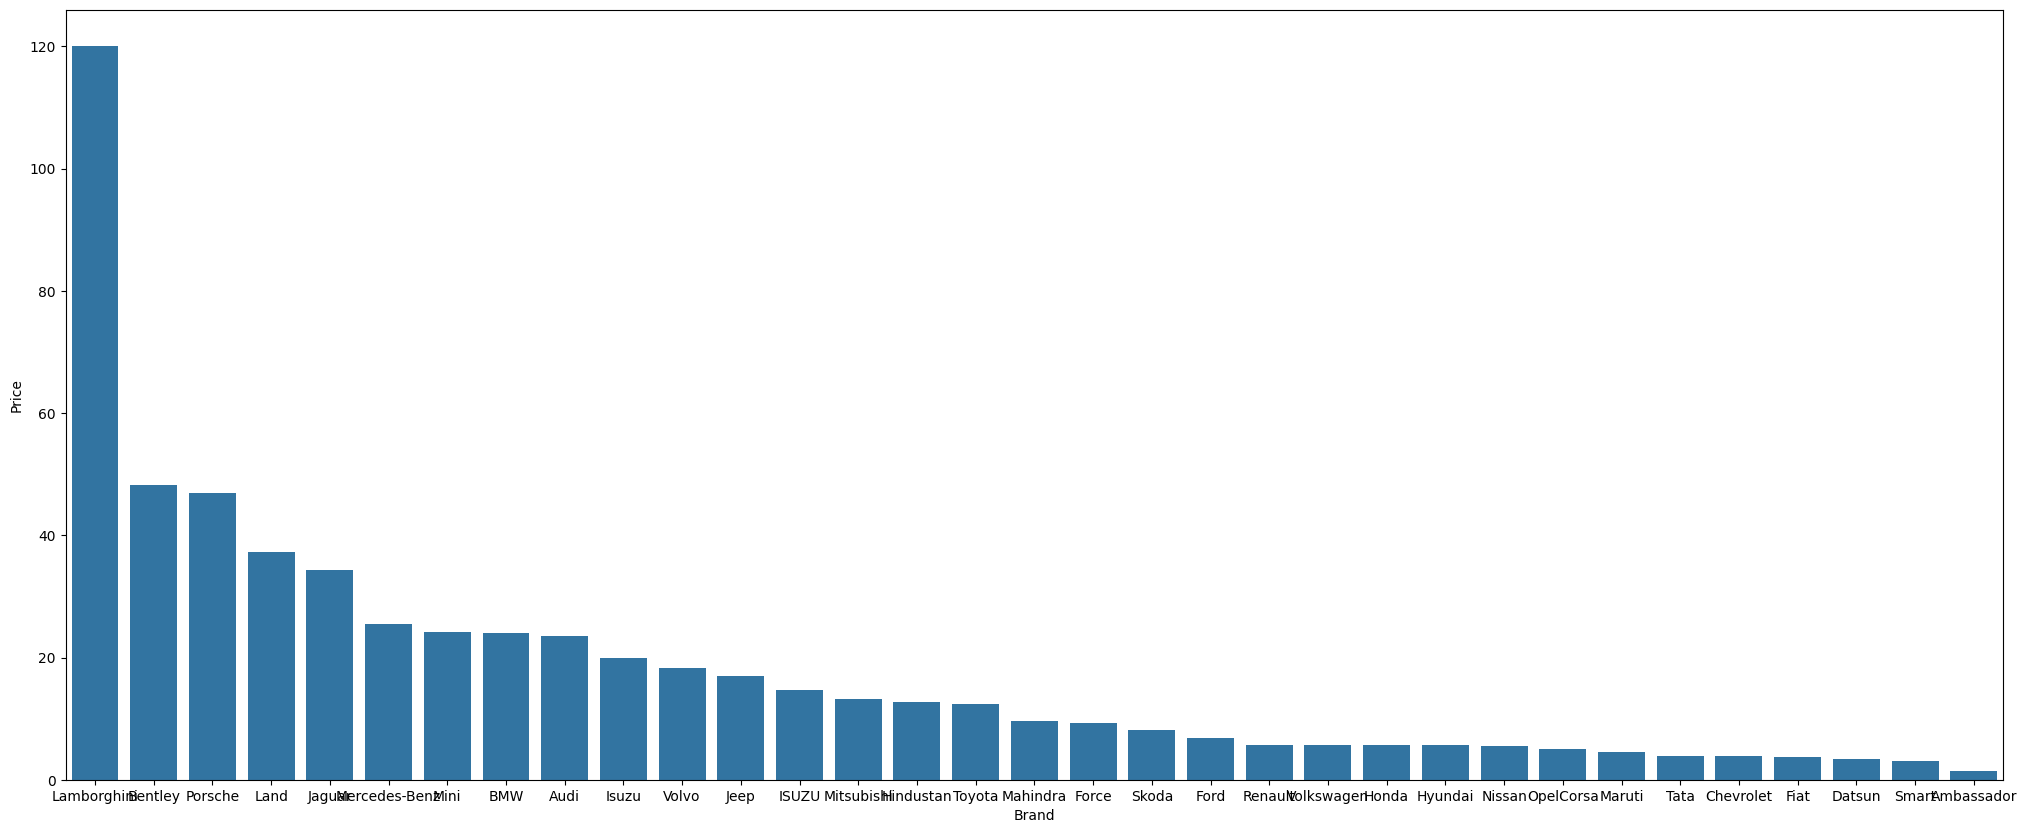

In [192]:
plt.figure(figsize=(25, 10))
sns.barplot(cars_df.groupby('Brand')['Price'].mean().sort_values(ascending=False))

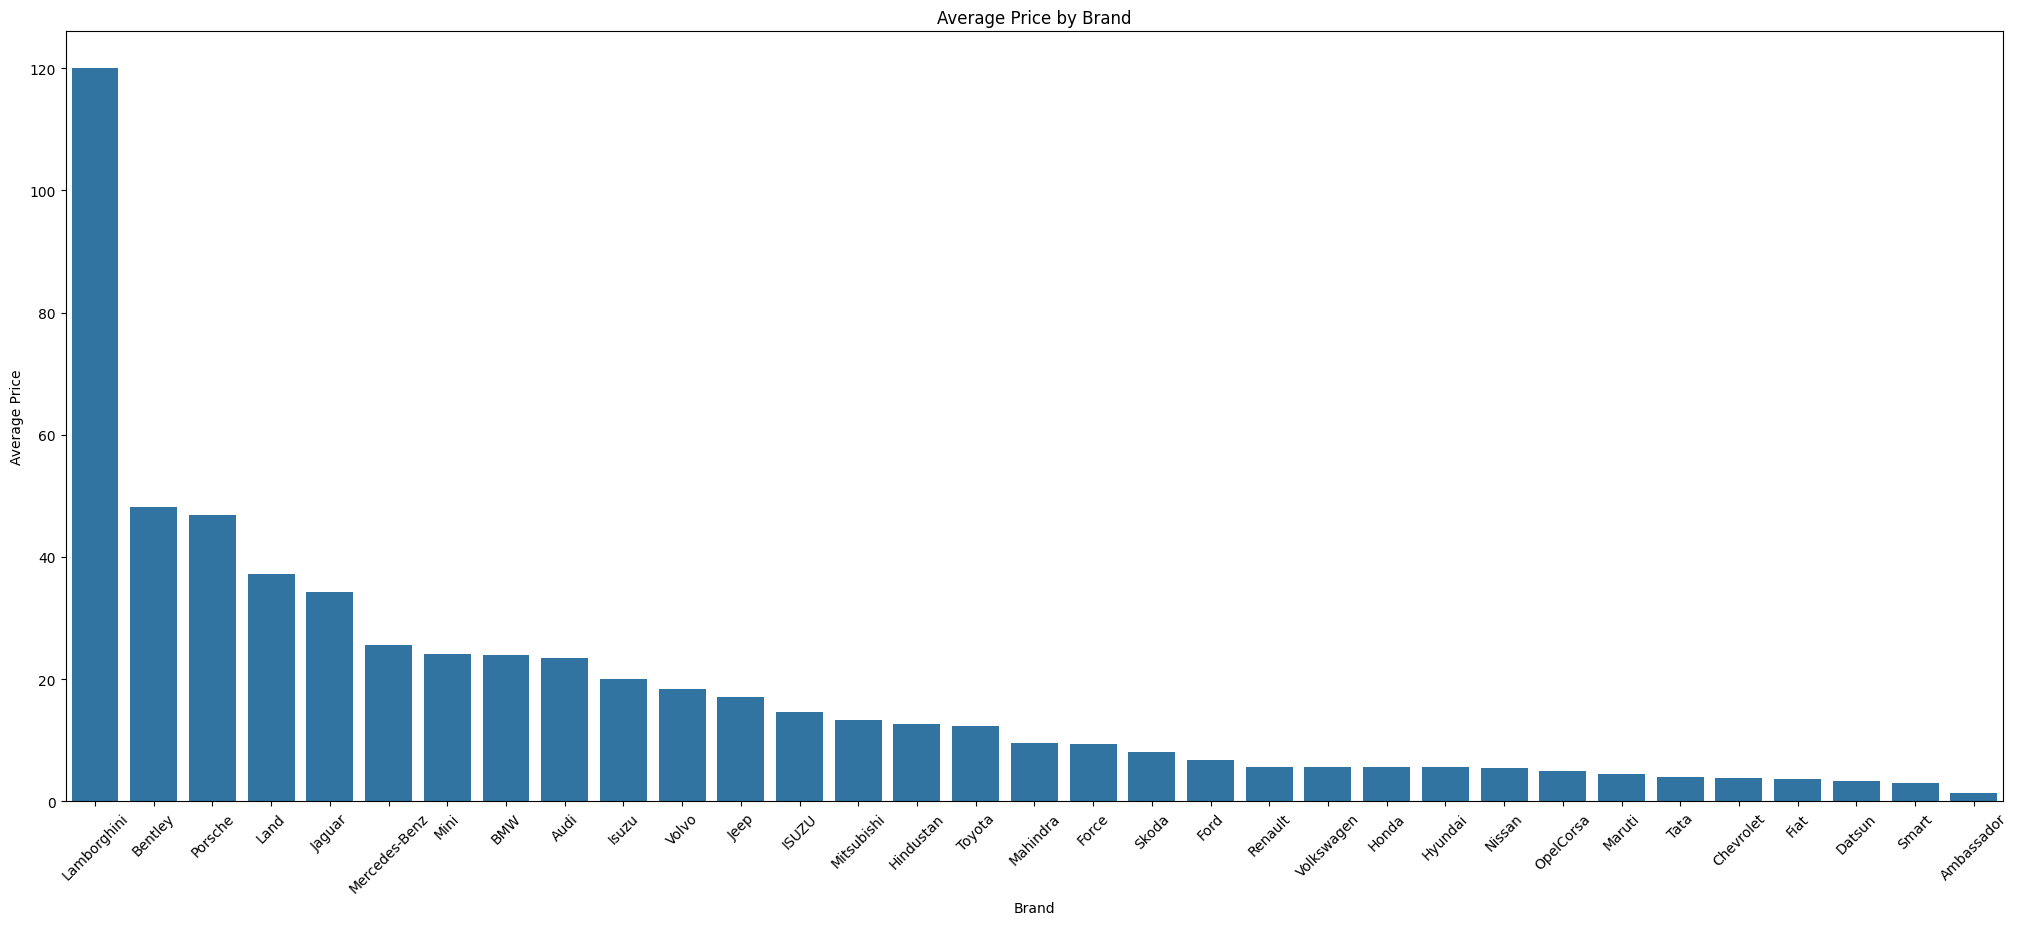

In [193]:
average_price = cars_df.groupby('Brand')['Price'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(25, 10))
sns.barplot(data=average_price, x='Brand', y='Price')
plt.xticks(rotation=45)
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.show()

## What have we learned?
- So as per the graphs above, it is clearly observed that imported cars maintain a much higher mean price /
as compared to local ones.
- I would consider to change my approach and fill the missing values in new prices by brands.

In [194]:
# Creating DataFrames for imported and local cars
imported_df = cars_df[cars_df['Brand'].isin(imported_brands)].reset_index(drop=True)
local_df = cars_df[cars_df['Brand'].isin(local_brands)].reset_index(drop=True)


In [195]:
imported_df.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine(CC),Power(bhp),Seats,New_Price,Price,Engine Tier,Price Tier,Overall Tier,Brand
700,Audi A6 2.7 TDI,Ahmedabad,2009,78000,Diesel,Automatic,First,12.4,2698.0,179.50,5.0,NaN,8.000000,very large,Medium,very large - Medium,Audi
919,BMW 6 Series 630i Coupe,Mumbai,2011,5900,Petrol,Automatic,First,7.94,4395.0,450.00,4.0,NaN,47.500000,huge,Very High,huge - Very High,BMW
1047,Mitsubishi Pajero Sport 4X4 AT,Pune,2015,78000,Diesel,Automatic,First,13.5,2477.0,175.56,6.0,NaN,15.000000,very large,Medium,very large - Medium,Mitsubishi
1200,Bentley Flying Spur W12,Bangalore,2008,31200,Petrol,Automatic,Second,10.2,5998.0,616.00,5.0,375.0,37.437049,huge,Very High,huge - Very High,Bentley
407,Mercedes-Benz New C-Class C 220 CDI Elegance AT,Hyderabad,2013,21000,Diesel,Automatic,First,14.84,2143.0,170.00,5.0,NaN,23.500000,very large,High,very large - High,Mercedes-Benz
803,Chevrolet Spark 1.0 LS,Chennai,2010,49000,Petrol,Manual,Second,18.0,995.0,62.00,5.0,NaN,1.400000,small,Low,small - Low,Chevrolet
1298,Chevrolet Spark 1.0 LS,Bangalore,2008,85142,Petrol,Manual,Second,18.0,995.0,62.00,5.0,NaN,2.885383,small,Low,small - Low,Chevrolet
110,Land Rover Range Rover Evoque 2.0 TD4 Pure,Delhi,2015,24000,Diesel,Automatic,Second,15.68,1999.0,177.00,5.0,NaN,33.500000,large,Very High,large - Very High,Land
205,Audi A6 2011-2015 2.0 TDI,Hyderabad,2013,70181,Diesel,Automatic,First,17.68,1968.0,174.33,5.0,NaN,23.990000,large,High,large - High,Audi
307,Chevrolet Beat Diesel LS,Kochi,2016,83629,Diesel,Manual,First,25.44,936.0,56.30,5.0,NaN,3.150000,small,Low,small - Low,Chevrolet


In [196]:
imported_df.groupby('Brand')['Name'].count()

Brand
Audi             285
BMW              310
Bentley            2
Chevrolet        151
Jaguar            48
Lamborghini        1
Land              67
Mercedes-Benz    380
Mini              31
Mitsubishi        36
Porsche           19
Smart              1
Volvo             28
Name: Name, dtype: int64

In [197]:
imported_df.groupby('Brand')['New_Price'].count()

Brand
Audi             29
BMW              63
Bentley           1
Chevrolet         0
Jaguar            7
Lamborghini       0
Land             10
Mercedes-Benz    49
Mini             19
Mitsubishi       13
Porsche           1
Smart             0
Volvo             3
Name: New_Price, dtype: int64

In [198]:
imported_df.groupby('Overall Tier')['Price'].mean()

Overall Tier
huge - Extreme             64.871333
huge - High                23.096000
huge - Luxury             120.000000
huge - Medium              11.135556
huge - Very High           40.602832
large - Extreme            57.923750
large - High               22.128517
large - Low                 3.016250
large - Medium             11.697837
large - Very High          36.178592
medium - High              24.114286
medium - Low                3.060393
medium - Medium             5.500000
medium - Very High         32.775000
medium - Very Low           0.928000
small - Low                 2.469704
small - Very Low            0.970000
very large - Extreme       63.860625
very large - High          21.817704
very large - Low            3.974000
very large - Luxury       160.000000
very large - Medium        10.931165
very large - Very High     39.460892
Name: Price, dtype: float64

In [199]:
# Lets see the percent increase in price

imported_df['Percentage_Increase'] = ((imported_df['New_Price'] - imported_df['Price']) / imported_df['Price']) * 100

In [200]:
imported_df.groupby('Overall Tier')['Percentage_Increase'].mean()

Overall Tier
huge - Extreme                    NaN
huge - High                       NaN
huge - Luxury                     NaN
huge - Medium                     NaN
huge - Very High           901.681511
large - Extreme             38.185695
large - High               138.350813
large - Low                       NaN
large - Medium             345.556479
large - Very High           55.510048
medium - High               66.982598
medium - Low               619.473412
medium - Medium                   NaN
medium - Very High          28.999907
medium - Very Low                 NaN
small - Low                       NaN
small - Very Low                  NaN
very large - Extreme        51.233929
very large - High          177.931035
very large - Low          6632.673267
very large - Luxury         43.750000
very large - Medium        241.836583
very large - Very High     119.716931
Name: Percentage_Increase, dtype: float64

In [201]:
imported_df.describe()

,Year,Kilometers_Driven,Engine(CC),Power(bhp),Seats,New_Price,Price,Percentage_Increase
count,1359.000000,1.359000e+03,1359.000000,1351.000000,1351.000000,195.000000,1359.000000,195.000000
mean,2013.275938,5.847025e+04,2238.320187,186.618097,5.109548,66.082769,23.091430,187.304123
std,2.985917,1.772721e+05,642.492751,65.013026,0.764871,37.243701,16.317888,488.388226
min,1998.000000,1.000000e+03,799.000000,56.300000,0.000000,31.930000,0.750000,15.183673
25%,2011.000000,3.270850e+04,1968.000000,163.700000,5.000000,44.670000,12.744100,51.295652
50%,2014.000000,5.000100e+04,1999.000000,183.000000,5.000000,55.610000,19.978026,82.680000
75%,2015.000000,7.000000e+04,2498.000000,204.000000,5.000000,71.820000,29.980000,221.385810
max,2019.000000,6.500000e+06,5998.000000,616.000000,10.000000,375.000000,160.000000,6632.673267


In [202]:
imported_df.sort_values(by='Percentage_Increase', ascending=False).head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine(CC),Power(bhp),Seats,New_Price,Price,Engine Tier,Price Tier,Overall Tier,Brand,Percentage_Increase
619,Porsche Cayenne Base,Kochi,2019,14298,Petrol,Automatic,First,13.33,2995.0,340.00,5.0,136.00,2.020000,very large,Low,very large - Low,Porsche,6632.673267
1200,Bentley Flying Spur W12,Bangalore,2008,31200,Petrol,Automatic,Second,10.2,5998.0,616.00,5.0,375.00,37.437049,huge,Very High,huge - Very High,Bentley,901.681511
1173,BMW 7 Series 730Ld DPE Signature,Chennai,2017,16000,Diesel,Automatic,First,16.77,2993.0,261.49,5.0,158.00,19.978026,very large,High,very large - High,BMW,690.868920
609,BMW 3 Series 320d Luxury Line,Delhi,2019,87000,Diesel,Automatic,First,22.69,1995.0,190.00,5.0,52.46,6.670000,large,Medium,large - Medium,BMW,686.506747
1225,Mini Cooper 3 DOOR D,Coimbatore,2017,26002,Diesel,Automatic,First,20.7,1496.0,113.98,4.0,36.50,4.968912,medium,Low,medium - Low,Mini,634.567260


<Axes: xlabel='Brand', ylabel='Price'>

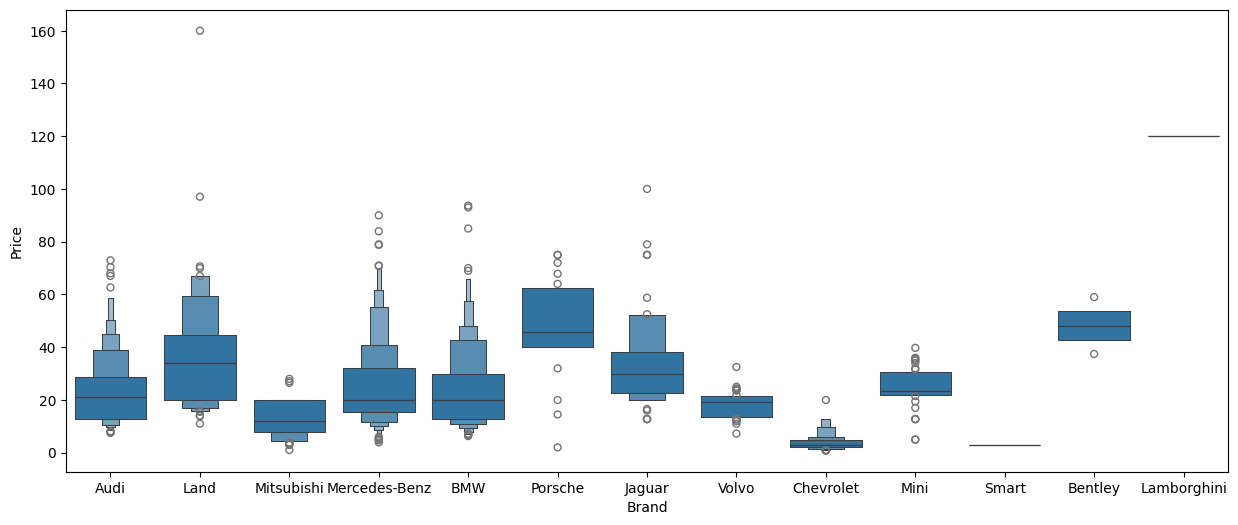

In [203]:
plt.figure(figsize=(15, 6))
sns.boxenplot(x = 'Brand', y = 'Price', data = imported_df)

### Observation: 
- There seems to be a massive amount of outliers in the Price column.

In [204]:
imported_df.isna().sum()

Name                      0
Location                  0
Year                      0
Kilometers_Driven         0
Fuel_Type                 0
Transmission              0
Owner_Type                0
Mileage                   0
Engine(CC)                0
Power(bhp)                8
Seats                     8
New_Price              1164
Price                     0
Engine Tier               0
Price Tier                0
Overall Tier              0
Brand                     0
Percentage_Increase    1164
dtype: int64

In [205]:
imported_df.describe()

,Year,Kilometers_Driven,Engine(CC),Power(bhp),Seats,New_Price,Price,Percentage_Increase
count,1359.000000,1.359000e+03,1359.000000,1351.000000,1351.000000,195.000000,1359.000000,195.000000
mean,2013.275938,5.847025e+04,2238.320187,186.618097,5.109548,66.082769,23.091430,187.304123
std,2.985917,1.772721e+05,642.492751,65.013026,0.764871,37.243701,16.317888,488.388226
min,1998.000000,1.000000e+03,799.000000,56.300000,0.000000,31.930000,0.750000,15.183673
25%,2011.000000,3.270850e+04,1968.000000,163.700000,5.000000,44.670000,12.744100,51.295652
50%,2014.000000,5.000100e+04,1999.000000,183.000000,5.000000,55.610000,19.978026,82.680000
75%,2015.000000,7.000000e+04,2498.000000,204.000000,5.000000,71.820000,29.980000,221.385810
max,2019.000000,6.500000e+06,5998.000000,616.000000,10.000000,375.000000,160.000000,6632.673267


In [206]:
imported_df.shape

(1359, 18)

In [207]:
imported_df.describe()

,Year,Kilometers_Driven,Engine(CC),Power(bhp),Seats,New_Price,Price,Percentage_Increase
count,1359.000000,1.359000e+03,1359.000000,1351.000000,1351.000000,195.000000,1359.000000,195.000000
mean,2013.275938,5.847025e+04,2238.320187,186.618097,5.109548,66.082769,23.091430,187.304123
std,2.985917,1.772721e+05,642.492751,65.013026,0.764871,37.243701,16.317888,488.388226
min,1998.000000,1.000000e+03,799.000000,56.300000,0.000000,31.930000,0.750000,15.183673
25%,2011.000000,3.270850e+04,1968.000000,163.700000,5.000000,44.670000,12.744100,51.295652
50%,2014.000000,5.000100e+04,1999.000000,183.000000,5.000000,55.610000,19.978026,82.680000
75%,2015.000000,7.000000e+04,2498.000000,204.000000,5.000000,71.820000,29.980000,221.385810
max,2019.000000,6.500000e+06,5998.000000,616.000000,10.000000,375.000000,160.000000,6632.673267


In [208]:
imported_df[imported_df['Price'] < imported_df['Price'].quantile(0.25)].groupby('Brand')['Price'].count().sort_values(ascending=False)

Brand
Chevrolet        142
Mercedes-Benz     65
BMW               55
Audi              31
Mitsubishi        19
Volvo              4
Mini               2
Land               1
Porsche            1
Smart              1
Name: Price, dtype: int64

In [209]:
# Cheap Cheverolet cars should not be a part of this dataframe since they are very inexpensive
# Lets remove the lower than 25th percentile values

imported_df = imported_df[imported_df['Price'] > imported_df['Price'].quantile(0.25)].reset_index(drop=True)

In [210]:
# Lets see the percent increase in price again

imported_df['Percentage_Increase'] = ((imported_df['New_Price'] - imported_df['Price']) / imported_df['Price']) * 100

In [211]:
imported_df.describe()

,Year,Kilometers_Driven,Engine(CC),Power(bhp),Seats,New_Price,Price,Percentage_Increase
count,940.000000,9.400000e+02,940.000000,933.000000,933.000000,164.000000,940.000000,164.000000
mean,2014.174468,5.550473e+04,2393.998117,204.176562,5.098607,68.145549,29.745242,113.782107
std,2.465391,2.119951e+05,603.215050,60.246414,0.808305,39.378779,15.281535,118.367597
min,2003.000000,1.000000e+03,1395.000000,80.000000,0.000000,31.930000,12.750000,15.183673
25%,2013.000000,2.954950e+04,1995.000000,174.300000,5.000000,45.220000,19.978026,43.091639
50%,2014.000000,4.600000e+04,2143.000000,187.740000,5.000000,57.985000,25.000000,70.687533
75%,2016.000000,6.371700e+04,2967.000000,241.000000,5.000000,78.017500,35.985000,137.048803
max,2019.000000,6.500000e+06,5998.000000,616.000000,10.000000,375.000000,160.000000,901.681511


In [212]:
imported_df['Percentage_Increase'].mode()

0    70.687533
Name: Percentage_Increase, dtype: float64

In [213]:
# Fill missing values in New_Price with a 70% increase on Price which is the median increase
imported_df['New_Price'] = imported_df['New_Price'].fillna(imported_df['Price'] * 1.70)

In [214]:
imported_df.describe()

,Year,Kilometers_Driven,Engine(CC),Power(bhp),Seats,New_Price,Price,Percentage_Increase
count,940.000000,9.400000e+02,940.000000,933.000000,933.000000,940.000000,940.000000,164.000000
mean,2014.174468,5.550473e+04,2393.998117,204.176562,5.098607,51.899440,29.745242,113.782107
std,2.465391,2.119951e+05,603.215050,60.246414,0.808305,28.053824,15.281535,118.367597
min,2003.000000,1.000000e+03,1395.000000,80.000000,0.000000,21.675000,12.750000,15.183673
25%,2013.000000,2.954950e+04,1995.000000,174.300000,5.000000,33.962645,19.978026,43.091639
50%,2014.000000,4.600000e+04,2143.000000,187.740000,5.000000,44.200000,25.000000,70.687533
75%,2016.000000,6.371700e+04,2967.000000,241.000000,5.000000,62.521750,35.985000,137.048803
max,2019.000000,6.500000e+06,5998.000000,616.000000,10.000000,375.000000,160.000000,901.681511


<Axes: xlabel='Brand'>

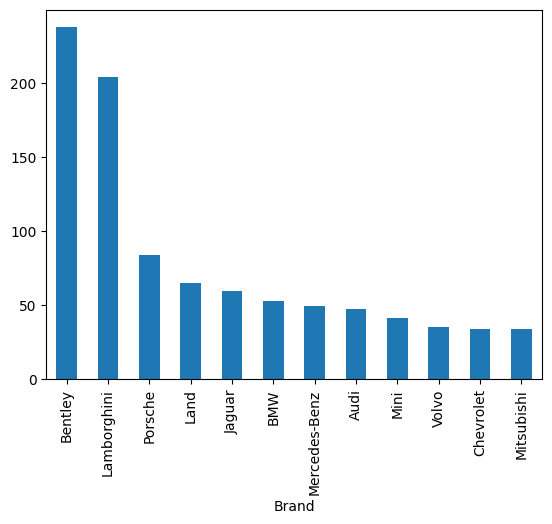

In [215]:
# Average New Price of Imported Cars by brand

imported_df.groupby('Brand')['New_Price'].mean().sort_values(ascending=False).plot(kind='bar')

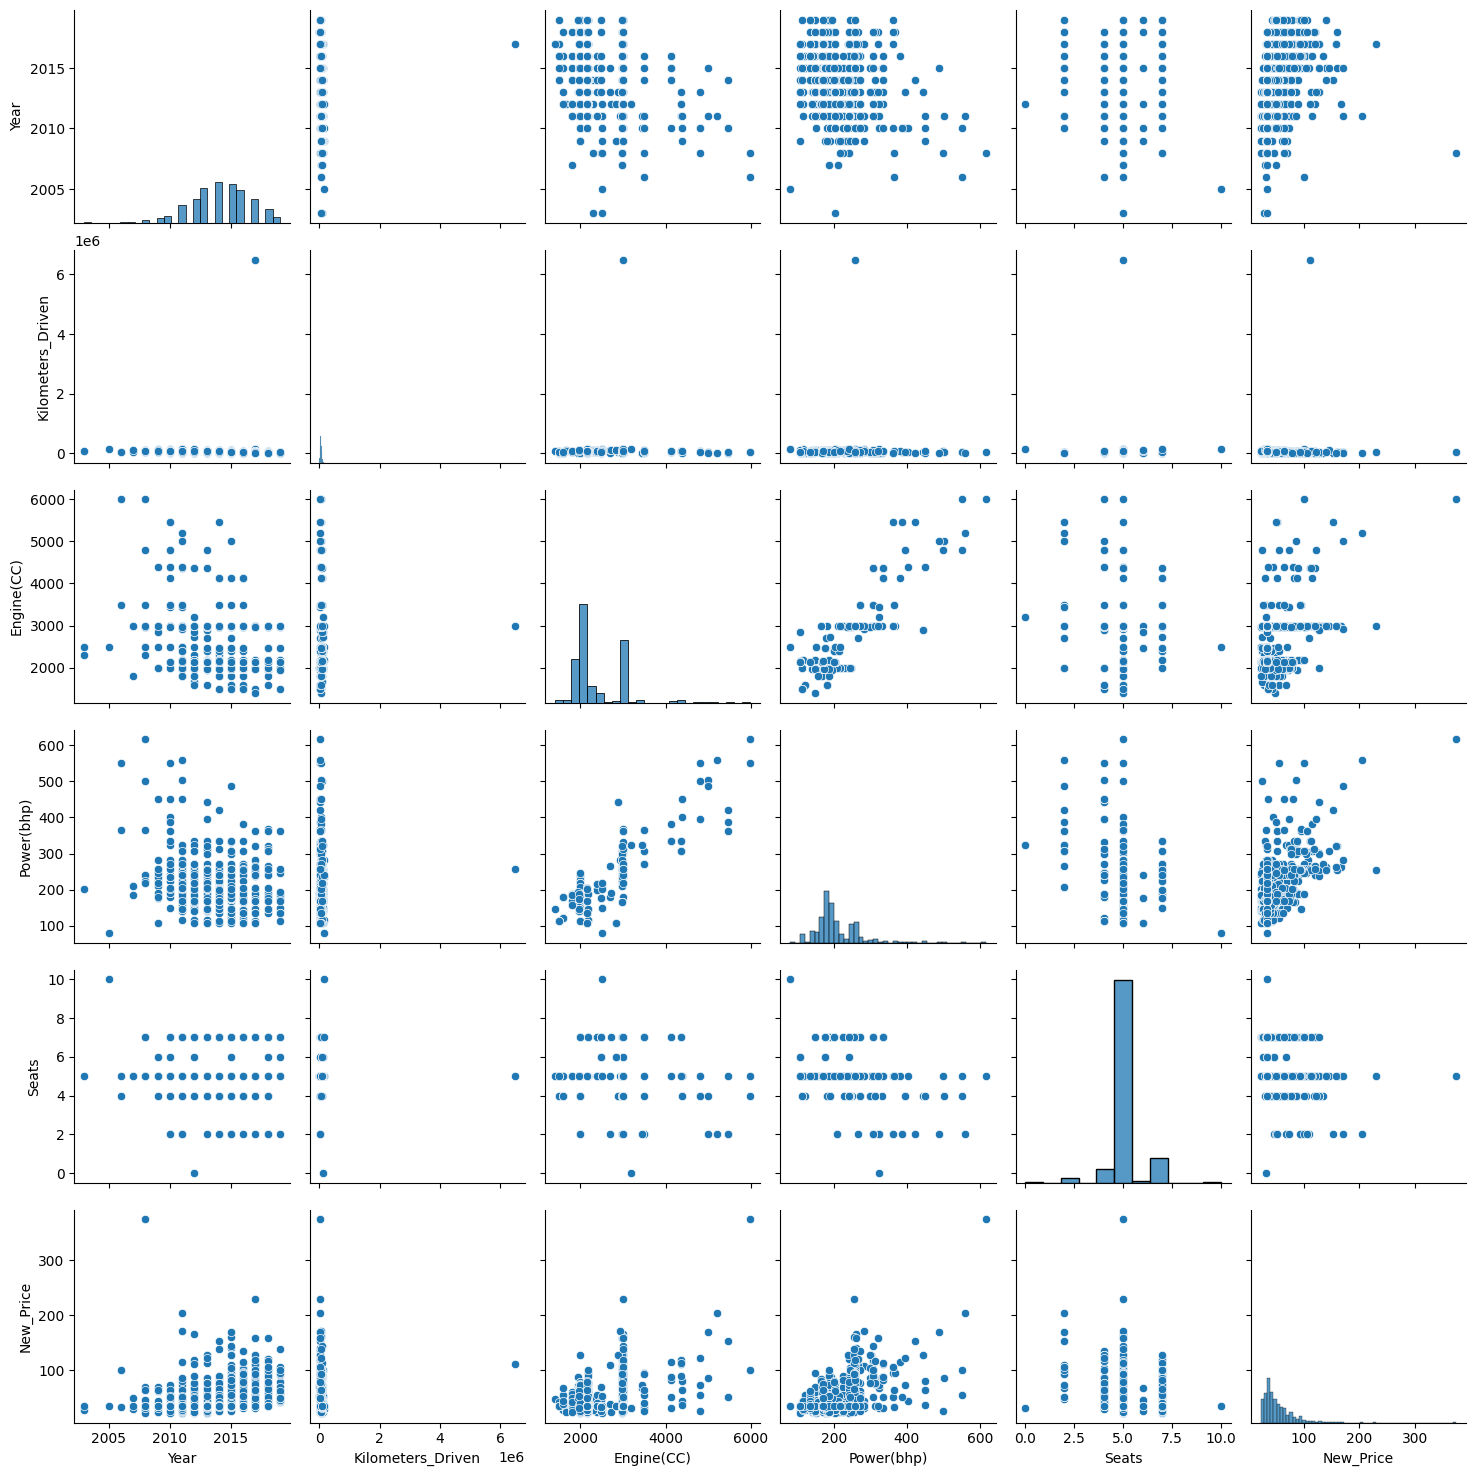

In [216]:
# Relationship of New Price with multiple features

sns.pairplot(imported_df[['Year', 'Kilometers_Driven', 'Engine(CC)', 'Power(bhp)', 'Seats', 'New_Price']])

### Doing the same for local cars

In [217]:
# Lets do the same for local cars

local_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine(CC),Power(bhp),Seats,New_Price,Price,Engine Tier,Price Tier,Overall Tier,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998.0,58.16,5.0,NaN,1.75,small,Low,small - Low,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,large,Medium,large - Medium,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199.0,88.70,5.0,8.61,4.50,medium,Low,medium - Low,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,medium,Medium,medium - Medium,Maruti
4,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1,814.0,55.20,5.0,NaN,2.35,small,Low,small - Low,Hyundai


In [218]:
# Lets check the shape of the dataset
local_df.shape

(5884, 17)

In [219]:
# information about the dataset
local_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5884 entries, 0 to 5883
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               5884 non-null   object  
 1   Location           5884 non-null   object  
 2   Year               5884 non-null   int64   
 3   Kilometers_Driven  5884 non-null   int64   
 4   Fuel_Type          5884 non-null   object  
 5   Transmission       5884 non-null   object  
 6   Owner_Type         5884 non-null   object  
 7   Mileage            5884 non-null   object  
 8   Engine(CC)         5884 non-null   float64 
 9   Power(bhp)         5856 non-null   float64 
 10  Seats              5849 non-null   float64 
 11  New_Price          811 non-null    float64 
 12  Price              5884 non-null   float64 
 13  Engine Tier        5884 non-null   category
 14  Price Tier         5884 non-null   category
 15  Overall Tier       5884 non-null   object  
 16  Brand 

In [220]:
local_df.describe()

,Year,Kilometers_Driven,Engine(CC),Power(bhp),Seats,New_Price,Price
count,5884.000000,5884.000000,5884.000000,5856.000000,5849.000000,811.000000,5884.000000
mean,2013.389361,58726.940517,1472.142497,95.458432,5.319029,12.367731,6.265094
std,3.313496,39117.893118,479.109206,31.220886,0.817127,7.994042,4.669835
min,1996.000000,171.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,2011.000000,34003.000000,1197.000000,74.000000,5.000000,7.145000,3.420000
50%,2014.000000,54000.000000,1373.000000,88.350000,5.000000,10.250000,4.968912
75%,2016.000000,74000.000000,1582.000000,110.400000,5.000000,15.020000,7.222500
max,2019.000000,775000.000000,4951.000000,395.000000,10.000000,83.920000,56.800000


In [221]:
local_df.groupby('Brand')['Price'].count().sum()

5884

In [222]:
local_df.groupby('Brand')['New_Price'].count().sum()

811

<Axes: xlabel='Brand'>

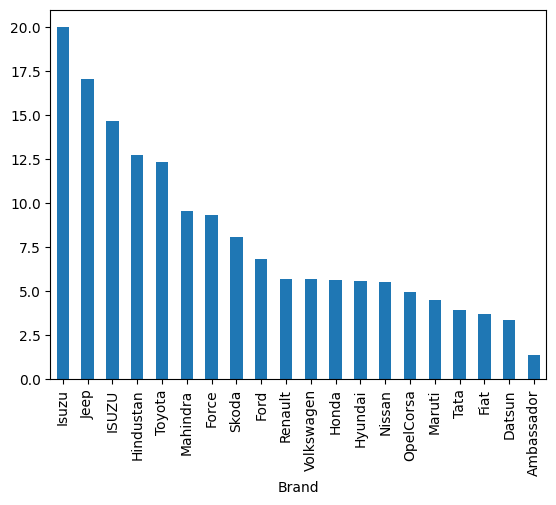

In [223]:
local_df.groupby('Brand')['Price'].mean().sort_values(ascending=False).plot(kind='bar')

In [224]:
local_df.groupby('Brand')['Price'].count()

Brand
Ambassador       1
Datsun          17
Fiat            37
Force            3
Ford           351
Hindustan        1
Honda          743
Hyundai       1339
ISUZU            3
Isuzu            2
Jeep            19
Mahindra       330
Maruti        1442
Nissan         117
OpelCorsa        1
Renault        170
Skoda          201
Tata           228
Toyota         505
Volkswagen     374
Name: Price, dtype: int64

In [225]:
# lets see the increase in price of cars
local_df['Percentage_Increase'] = (local_df['New_Price'] - local_df['Price']) / local_df['Price'] * 100

In [226]:
local_df['Percentage_Increase'].mean()

67.53915962984281

In [227]:
local_df['Percentage_Increase'].median()

43.18813716404078

In [228]:
local_df.describe(percentiles=[0.10, 0.20, 0.50, 0.75, 0.95, 0.99])

,Year,Kilometers_Driven,Engine(CC),Power(bhp),Seats,New_Price,Price,Percentage_Increase
count,5884.000000,5884.000000,5884.000000,5856.000000,5849.000000,811.000000,5884.000000,811.000000
mean,2013.389361,58726.940517,1472.142497,95.458432,5.319029,12.367731,6.265094,67.539160
std,3.313496,39117.893118,479.109206,31.220886,0.817127,7.994042,4.669835,90.175285
min,1996.000000,171.000000,72.000000,34.200000,2.000000,3.910000,0.440000,-45.640276
10%,2009.000000,19951.800000,998.000000,67.000000,5.000000,5.120000,2.400000,13.013699
20%,2011.000000,30000.000000,1197.000000,73.000000,5.000000,6.540000,3.000000,21.300000
50%,2014.000000,54000.000000,1373.000000,88.350000,5.000000,10.250000,4.968912,43.188137
75%,2016.000000,74000.000000,1582.000000,110.400000,5.000000,15.020000,7.222500,77.000522
95%,2018.000000,124896.950000,2494.000000,164.700000,7.000000,28.050000,16.607000,210.372610
99%,2019.000000,180000.000000,2982.000000,182.703000,8.000000,37.505000,21.991700,409.729310


In [229]:
local_df[local_df['Percentage_Increase'] < 0].count()

Name                   12
Location               12
Year                   12
Kilometers_Driven      12
Fuel_Type              12
Transmission           12
Owner_Type             12
Mileage                12
Engine(CC)             12
Power(bhp)             12
Seats                  12
New_Price              12
Price                  12
Engine Tier            12
Price Tier             12
Overall Tier           12
Brand                  12
Percentage_Increase    12
dtype: int64

## Observation:
- Some cars seems to have dropped significantly in price without any reason to be seen till now.
- For now we will not analyze these cars. 

In [230]:
# Drop cars with an increased price less than 0
local_df = local_df[local_df['Percentage_Increase'] > 0]

In [231]:
local_df.describe()

,Year,Kilometers_Driven,Engine(CC),Power(bhp),Seats,New_Price,Price,Percentage_Increase
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,2015.964956,40329.397997,1458.286608,100.007322,5.336671,12.415106,8.108837,68.903494
std,2.304246,28892.556983,484.662345,34.959924,0.777532,8.036839,5.719439,90.127847
min,2001.000000,600.000000,72.000000,41.000000,4.000000,3.910000,0.700000,0.165017
25%,2015.000000,20000.000000,1197.000000,74.000000,5.000000,7.160000,4.715000,26.193515
50%,2017.000000,35000.000000,1248.000000,88.500000,5.000000,10.150000,6.000000,44.307270
75%,2017.000000,53880.500000,1540.000000,117.300000,5.000000,15.050000,9.610000,77.562119
max,2019.000000,215000.000000,4951.000000,395.000000,8.000000,83.920000,56.800000,1283.902439


In [232]:
median_increase = local_df['Percentage_Increase'].median()
median_increase_percent = median_increase / 100  
median_increase_percent

0.4430727023319615

In [233]:
# Lets fill the missing values in New_Price with a increase on Price which is the median increase

local_df['New_Price'] = local_df['New_Price'].fillna(local_df['Price'] * (1 + median_increase_percent))

In [234]:
local_df.describe()

,Year,Kilometers_Driven,Engine(CC),Power(bhp),Seats,New_Price,Price,Percentage_Increase
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,2015.964956,40329.397997,1458.286608,100.007322,5.336671,12.415106,8.108837,68.903494
std,2.304246,28892.556983,484.662345,34.959924,0.777532,8.036839,5.719439,90.127847
min,2001.000000,600.000000,72.000000,41.000000,4.000000,3.910000,0.700000,0.165017
25%,2015.000000,20000.000000,1197.000000,74.000000,5.000000,7.160000,4.715000,26.193515
50%,2017.000000,35000.000000,1248.000000,88.500000,5.000000,10.150000,6.000000,44.307270
75%,2017.000000,53880.500000,1540.000000,117.300000,5.000000,15.050000,9.610000,77.562119
max,2019.000000,215000.000000,4951.000000,395.000000,8.000000,83.920000,56.800000,1283.902439


<Axes: >

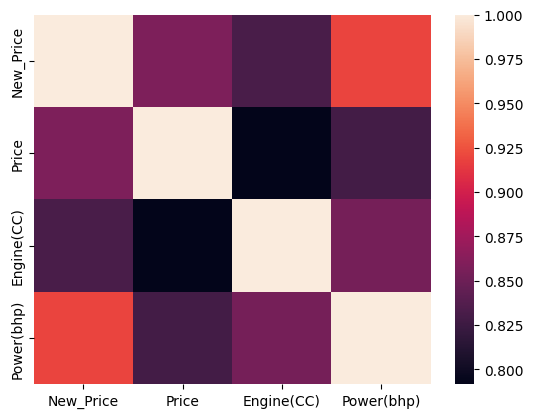

In [235]:
sns.heatmap(local_df[['New_Price', 'Price', 'Engine(CC)', 'Power(bhp)']].corr())

## What is achieved 
- Performed data cleaning and wrangling.
- Observed and explored the data. 
- Calculated the correlation between the variables.
- Did some top notch feature engineering that we later used to fill the na values accross various columns.
- Predicted the new prices of the cars based on the median increase in percent of the old price.

In [274]:
# Now we can merge the two dataframes
final_df = pd.concat([local_df, cars_df], axis = 0)

In [237]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8042 entries, 2 to 7252
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Name                 8042 non-null   object  
 1   Location             8042 non-null   object  
 2   Year                 8042 non-null   int64   
 3   Kilometers_Driven    8042 non-null   int64   
 4   Fuel_Type            8042 non-null   object  
 5   Transmission         8042 non-null   object  
 6   Owner_Type           8042 non-null   object  
 7   Mileage              8042 non-null   object  
 8   Engine(CC)           8042 non-null   float64 
 9   Power(bhp)           8006 non-null   float64 
 10  Seats                7999 non-null   float64 
 11  New_Price            1805 non-null   float64 
 12  Price                8042 non-null   float64 
 13  Engine Tier          8042 non-null   category
 14  Price Tier           8042 non-null   category
 15  Overall Tier         8042 

### **Final Step:**
Now what I want to do is to calculate the price drop among the owner types, for example: the average price drop from first to second owner and so on.

* As it cannot be overseen that the price drop from owner to owner is massive and is a strong inverse relation between price and owner type. 
* So, this correlation must be carried upon the New_Price as well.

<Axes: xlabel='Owner_Type'>

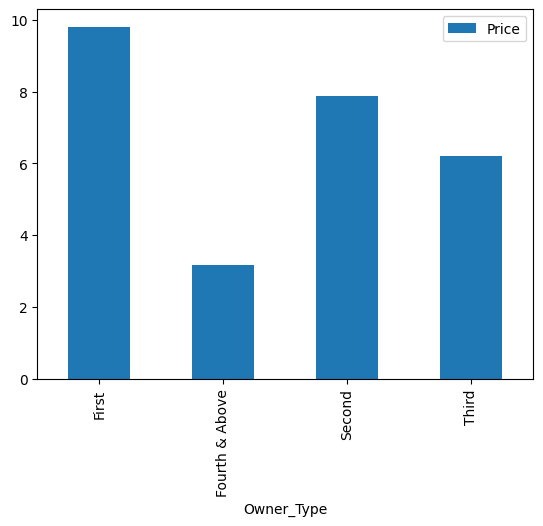

In [244]:
cars_df.groupby('Owner_Type').agg({
    'Price' : 'mean'
}).plot(kind='bar')

In [247]:
price_by_owner = cars_df.groupby('Owner_Type').agg({
    'Price' : 'mean'
})['Price']

In [252]:
price_by_owner

Owner_Type
First             9.804991
Fourth & Above    3.181346
Second            7.882902
Third             6.214058
Name: Price, dtype: float64

In [253]:
# Lets find out the percentage decrease in price for each owner type
first_owner_price = price_by_owner['First']

# Calculate percentage decrease for each owner type
second_owner_decrease = (first_owner_price - price_by_owner['Second']) / first_owner_price * 100
third_owner_decrease = (first_owner_price - price_by_owner['Third']) / first_owner_price * 100
fourth_owner_decrease = (first_owner_price - price_by_owner['Fourth & Above']) / first_owner_price * 100

# Display results
print(f"Second Owner Decrease: {second_owner_decrease}%")
print(f"Third Owner Decrease: {third_owner_decrease}%")
print(f"Fourth Owner Decrease: {fourth_owner_decrease}%")

Second Owner Decrease: 19.603167545151027%
Third Owner Decrease: 36.62352327550907%
Fourth Owner Decrease: 67.55381188963906%


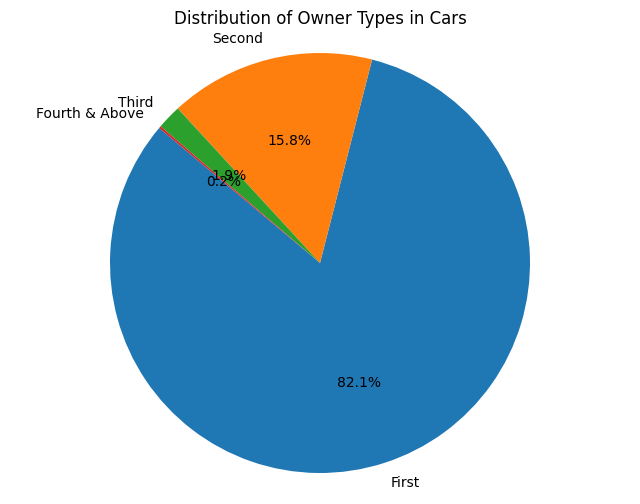

In [257]:
# Lets also see the composition of the cars sold by each owner type using a pie chart

# Count occurrences of each unique value in the Owner_Type column
owner_counts = cars_df['Owner_Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(owner_counts, labels=owner_counts.index.astype(str), autopct='%0.1f%%', startangle=140)
plt.title('Distribution of Owner Types in Cars')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- More than 82 percent cars are first hand driven.
- 15.8 percent of them have 2 owners.
- While cars with three owners are ~2 percent.
- And cars that have seen at least four owners are a mere 0.2 percent of the overall composition. 

In [277]:
# Lets apply the decrease in price for each owner type

final_df.loc[final_df['Owner_Type'] == 'Second', 'New_Price'] = final_df['New_Price'] * (1 - second_owner_decrease / 100)
final_df.loc[final_df['Owner_Type'] == 'Third', 'New_Price'] = final_df['New_Price'] * (1 - third_owner_decrease / 100)
final_df.loc[final_df['Owner_Type'] == 'Fourth & Above', 'New_Price'] = final_df['New_Price'] * (1 - fourth_owner_decrease / 100)

ValueError: cannot reindex on an axis with duplicate labels

In [278]:
# It seems like we have some dupluicate indexes
print(final_df.index.duplicated().sum())  # Counts duplicates

799


In [279]:
# Lets reset the index with a clean reset
final_df.reset_index(drop=True, inplace=True)

In [280]:
# Lets try to apply the decrease in price for each owner type again

final_df.loc[final_df['Owner_Type'] == 'Second', 'New_Price'] = final_df['New_Price'] * (1 - second_owner_decrease / 100)
final_df.loc[final_df['Owner_Type'] == 'Third', 'New_Price'] = final_df['New_Price'] * (1 - third_owner_decrease / 100)
final_df.loc[final_df['Owner_Type'] == 'Fourth & Above', 'New_Price'] = final_df['New_Price'] * (1 - fourth_owner_decrease / 100)

In [290]:
cars_df.describe()

,Year,Kilometers_Driven,Engine(CC),Power(bhp),Seats,New_Price,Price
count,7243.000000,7.243000e+03,7243.000000,7207.000000,7200.000000,1006.000000,7243.000000
mean,2013.368080,5.867878e+04,1615.899985,112.546917,5.279722,22.779692,9.422209
std,3.254651,8.447409e+04,594.446497,53.383342,0.811660,27.759344,10.526502
min,1996.000000,1.710000e+02,72.000000,34.200000,0.000000,3.910000,0.440000
25%,2011.000000,3.400000e+04,1198.000000,76.000000,5.000000,7.885000,3.700000
50%,2014.000000,5.332200e+04,1493.000000,93.700000,5.000000,11.570000,5.450000
75%,2016.000000,7.300000e+04,1968.000000,138.100000,5.000000,26.042500,11.250000
max,2019.000000,6.500000e+06,5998.000000,616.000000,10.000000,375.000000,160.000000


In [291]:
final_df.describe()

,Year,Kilometers_Driven,Engine(CC),Power(bhp),Seats,New_Price,Price,Percentage_Increase
count,8042.000000,8.042000e+03,8042.000000,8006.000000,7999.000000,1805.000000,8042.000000,799.000000
mean,2013.626088,5.685570e+04,1600.240561,111.295463,5.285411,17.867431,9.291721,68.903494
std,3.266595,8.086895e+04,586.335102,51.974065,0.808449,21.046999,10.158619,90.127847
min,1996.000000,1.710000e+02,72.000000,34.200000,0.000000,2.883630,0.440000,0.165017
25%,2012.000000,3.200000e+04,1197.000000,75.000000,5.000000,7.480000,3.750000,26.193515
50%,2014.000000,5.159000e+04,1461.000000,90.000000,5.000000,10.940000,5.500000,44.307270
75%,2016.000000,7.200000e+04,1968.000000,136.000000,5.000000,19.270000,10.950000,77.562119
max,2019.000000,6.500000e+06,5998.000000,616.000000,10.000000,301.488122,160.000000,1283.902439


In [286]:
# Lets see how much of the correlation is maintained
new_corr = final_df[['Engine(CC)', 'Power(bhp)',
       'Seats', 'New_Price', 'Price']].corr()

In [287]:
old_corr = cars_df[['Engine(CC)', 'Power(bhp)',
       'Seats', 'New_Price', 'Price']].corr()

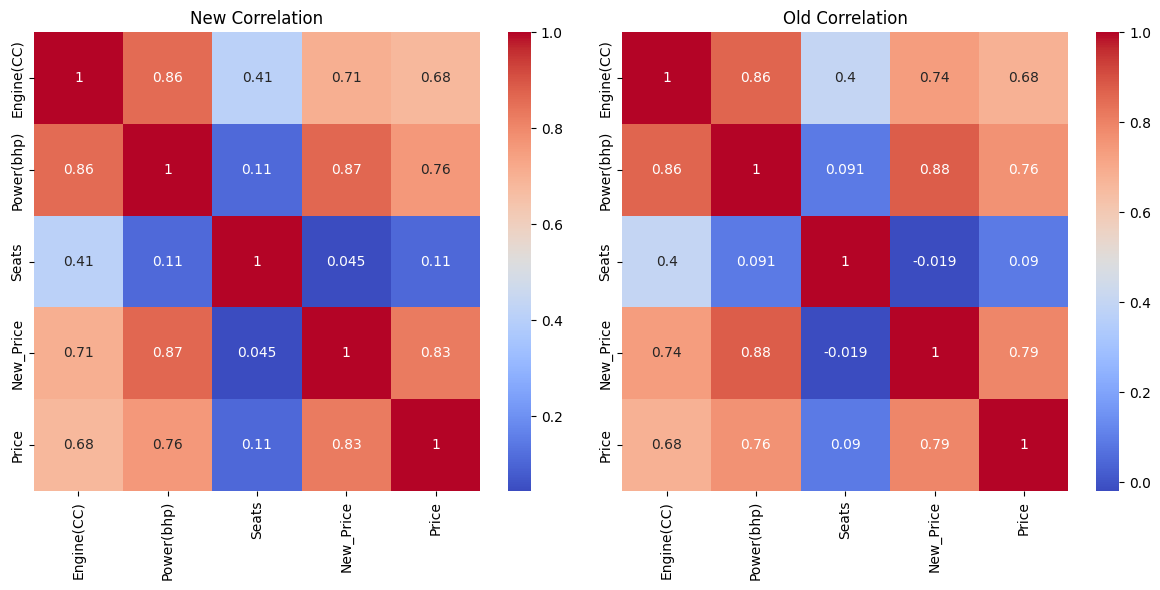

In [289]:
# Lets plot the correlation matrix of both the old and new dataframes

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first heatmap
sns.heatmap(new_corr, annot=True, ax=axes[0], cmap='coolwarm')
axes[0].set_title('New Correlation')

# Plot the second heatmap
sns.heatmap(old_corr, annot=True, ax=axes[1], cmap='coolwarm')
axes[1].set_title('Old Correlation')

# Adjust layout
plt.tight_layout()
plt.show()

### Correlation Comparison of Old and New Prices

To assess the accuracy of your predictions for `New_Price`, we can compare the correlations from both the old and new heatmaps.

#### Correlation Comparison Table

| Feature        | Old Correlation | New Correlation | Change            |
|----------------|-----------------|-----------------|-------------------|
| **Engine(CC)** | 1.00            | 1.00            | Maintained         |
| **Power(hp)**  | 0.86            | 0.86            | Maintained         |
| **Seats**      | 0.40            | 0.41            | Slight Increase    |
| **New_Price**  | 0.74            | 0.71            | Slight Decrease    |
| **Price**      | 0.68            | 0.68            | Maintained         |

#### Observations

- **Maintained Correlations**: 
  - The correlations for `Engine(CC)` and `Power(hp)` remained consistent, indicating that these relationships are stable in both datasets.
  
- **Slight Changes**: 
  - The correlation with `Seats` showed a slight increase, suggesting a marginally improved relationship.
  - The correlation with `New_Price` decreased slightly, indicating a potential divergence from the previous dataset.

#### Conclusion

- **Prediction Accuracy**: The maintained correlations, especially with key features, suggest that my predictions are reliable. The slight changes may indicate areas for further analysis or adjustments in modeling.
- **Next Steps**: Now we can validate the predictions with real data in cars_df or using regression metrics to quantify the accuracy of your predictions more formally. (this I won't be doing for now, you can do this on your own if you're following this approach).

---
## **Step by step summary of the overall work that I have done**
My goal was to predict the new prices for cars without using ML.
Here is how I did it:
1. Explored the data and performed some EDA steps to get info about the data.
2. Exploit the missing and bad data points.
3. Did the necessary feature engineering like ranking the engine and price into tiers \
to separate cars into groups.
4. Created separate dataframes for foreign and local cars to minimize the error chance in calculation.
5. Used the Tier features to fill in the missing values in 'Price', 'Power' and 'Engine' columns.
6. Then for predicting the new prices I found out the percent increase in price for the available \
 new prices and predicted the rest of the prices based on the original price plus the median \
 increase in price.
7. Verified the prediction using how much of the correlation among the features remained preserved.

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Step by Step Summary</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f9;
            color: #2c3e50; /* Darker color for better visibility */
            margin: 0;
            padding: 20px;
            line-height: 1.6;
        }
        h2 {
            text-align: center;
            color: #2980b9; /* Darker blue for header */
            margin-bottom: 20px;
        }
        .container {
            background-color: #fff;
            border-radius: 8px;
            box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);
            padding: 20px;
            max-width: 800px;
            margin: auto;
        }
        ol {
            padding-left: 20px;
        }
        li {
            margin-bottom: 15px;
            padding: 10px;
            background-color: #e6f7ff; /* Lighter background for list items */
            border-left: 5px solid #2980b9; /* Matching border color */
            border-radius: 4px;
        }
        .highlight {
            color: #e74c3c; /* Brighter highlight color */
            font-weight: bold;
        }
        p,li{
            color: black
        }
    </style>
</head>
<body>

<div class="container">
    <h2>Step by Step Summary of the Overall Work</h2>
    <p>My goal was to predict the new prices for cars without using ML. Here is how I did it:</p>
    <ol>
        <li>Explored the data and performed some EDA steps to get info about the data.</li>
        <li>Exploited the missing and bad data points.</li>
        <li>Did the necessary feature engineering like ranking the engine and price into tiers to separate cars into groups.</li>
        <li>Created separate dataframes for foreign and local cars to minimize the error chance in calculation.</li>
        <li>Used the Tier features to fill in the missing values in <span class="highlight">'Price'</span>, <span class="highlight">'Power'</span>, and <span class="highlight">'Engine'</span> columns.</li>
        <li>For predicting the new prices, found out the percent increase in price for the available new prices and predicted the rest of the prices based on the original price plus the median increase in price.</li>
        <li>Verified the prediction using how much of the correlation among the features remained preserved.</li>
    </ol>
</div>

</body>
</html>

---
<center><p style= "color:gold;">Please feel free to comment about any correction or problem that you found.

<p style= "color:gold;">If you like my work consider giving it an upvote.</p></center>

---